In [1]:
%pip install -q git+https://github.com/THU-MIG/yolov10.git
%pip install -q supervision roboflow


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# !wget -P -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
# !wget -P -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
# !wget -P -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
# !wget -P -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
# !wget -P -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
# !wget -P -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt

In [1]:
!nvidia-smi

Wed Jun 26 12:07:13 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.99                 Driver Version: 555.99         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   45C    P3             17W /   35W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import ultralytics
from ultralytics import YOLOv10
from roboflow import Roboflow
import cv2
import os
ultralytics.checks()

Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
Setup complete ✅ (12 CPUs, 7.4 GB RAM, 274.3/476.1 GB disk)


In [2]:
rf = Roboflow(api_key="Z1aUbwrIU48a7V8A0VnA")
project = rf.workspace("calorie-tracker").project("calorie-tracker-pmuck")
version = project.version(5)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Calorie-Tracker-5 in yolov8:: 100%|██████████| 31734/31734 [00:58<00:00, 541.83it/s] 


In [3]:
print(dataset.location)

c:\Users\navan\Desktop\vit materials\VS\PJT\Calorie-Tracker-5


In [ ]:
!yolo task=detect mode=train model=yolov10m.pt data={dataset.location}/data.yaml epochs=50 cos_lr=True lr0=0.001 patience=10 plots=True

In [2]:
model = YOLOv10("runs/detect/train4/weights/best.pt")

In [5]:
test = []
path = "Calorie-Tracker-5/test/images"
i=0
for img in os.listdir(path):
    test.append(path + "/" + img)
    i+=1
    if i==30:
        break
paths = []
for i in test:
    path = i.replace(".jpg", "")
    path = path.replace("images", "labels")
    path = path + ".txt"
    paths.append(path)

In [6]:
results = model(source=test,conf=0.3,save=True)


0: 640x640 3 pears, 924.7ms
1: 640x640 1 pear, 924.7ms
2: 640x640 2 pears, 924.7ms
3: 640x640 5 pears, 924.7ms
4: 640x640 1 pear, 924.7ms
5: 640x640 4 pears, 924.7ms
6: 640x640 4 pears, 924.7ms
7: 640x640 2 pears, 924.7ms
8: 640x640 1 pear, 924.7ms
9: 640x640 3 pears, 924.7ms
10: 640x640 3 pears, 924.7ms
11: 640x640 3 pears, 924.7ms
12: 640x640 4 pears, 924.7ms
13: 640x640 1 pear, 924.7ms
14: 640x640 1 pear, 924.7ms
15: 640x640 2 pears, 924.7ms
16: 640x640 2 pears, 924.7ms
17: 640x640 1 pear, 924.7ms
18: 640x640 3 pears, 924.7ms
19: 640x640 2 Mangos, 924.7ms
20: 640x640 2 Dosas, 1 Sambhar, 924.7ms
21: 640x640 2 Dosas, 2 Sambhars, 924.7ms
22: 640x640 1 Dosa, 924.7ms
23: 640x640 1 Dosa, 1 Sambhar, 924.7ms
24: 640x640 1 Dosa, 1 Sambhar, 924.7ms
25: 640x640 2 Dosas, 924.7ms
26: 640x640 1 Dosa, 924.7ms
27: 640x640 2 Dosas, 924.7ms
28: 640x640 1 Dosa, 924.7ms
29: 640x640 1 Dosa, 1 Sambhar, 924.7ms
Speed: 14.8ms preprocess, 924.7ms inference, 201.7ms postprocess per image at shape (1, 3, 640

In [7]:
names = results[0].names
labels = []
for i in range(len(paths)):
    with open(paths[i], "r") as file:
        l = []
        for line in file:
            line = line.split(" ")
            label = names[int(line[0])]
            l.append(label)
        labels.append(l)
print(labels)

[['pear', 'pear'], ['pear'], ['pear', 'pear'], ['pear', 'pear', 'pear', 'pear', 'pear', 'pear'], ['pear'], ['pear', 'pear', 'pear', 'pear'], ['pear', 'pear', 'pear', 'pear'], ['pear', 'pear'], ['pear'], ['pear', 'pear', 'pear'], ['pear', 'pear', 'pear'], ['pear', 'pear', 'pear'], ['pear', 'pear', 'pear', 'pear', 'pear', 'pear'], ['pear'], ['pear'], ['pear', 'pear'], ['pear', 'pear'], ['pear'], ['pear', 'pear', 'pear'], ['Mango'], ['Sambhar', 'Dosa', 'Dosa'], ['Sambhar', 'Sambhar', 'Dosa', 'Dosa'], ['Dosa'], ['Dosa', 'Sambhar'], ['Dosa'], ['Dosa', 'Dosa'], ['Dosa'], ['Dosa', 'Dosa'], ['Dosa', 'Sambhar'], ['Dosa', 'Sambhar']]


In [11]:
import matplotlib.pyplot as plt
metrics = model.val()
print(model)
metrics.confusion_matrix
plt.show()

Ultralytics YOLOv8.1.34 🚀 Python-3.10.10 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /teamspace/studios/this_studio/Calorie-Tracker-5/valid/labels.cache... 2386 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2386/2386 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 304, len(boxes) = 5613. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [00:59<00:00,  2.52it/s]


                   all       2386       5613      0.871      0.851      0.903      0.715
              Biriyani       2386        155      0.933      0.893      0.948      0.739
                 Chole       2386        105       0.82      0.857      0.904      0.531
           Dal Makhani       2386        192      0.786      0.802      0.841       0.62
                  Dosa       2386        175      0.878      0.903      0.916      0.746
           Gulab Jamun       2386        210      0.925      0.938      0.985      0.837
                  Idly       2386         95      0.753      0.578      0.652      0.437
               Khichdi       2386         88      0.918      0.909      0.965      0.752
                 Mango       2386        178      0.918      0.927      0.972      0.813
               Omlette       2386        101      0.817      0.793      0.854      0.619
                Paapad       2386         67      0.785      0.567      0.708      0.525
            Plain Ric

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="Z1aUbwrIU48a7V8A0VnA")
project = rf.workspace("calorie-tracker").project("calorie-tracker-pmuck")
version = project.version(5)
version.deploy("yolov8", "yolov10/runs/detect/train4/weights", "best.pt")

In [3]:
for result in results:
    result.show()

Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
Setup complete ✅ (12 CPUs, 7.4 GB RAM, 274.7/476.1 GB disk)



image 1/1 c:\Users\navan\Desktop\vit materials\VS\PJT\rice.jpeg: 640x640 1 Dosa, 1 Plain Rice, 1 Sambhar, 45.6ms
Speed: 4.0ms preprocess, 45.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


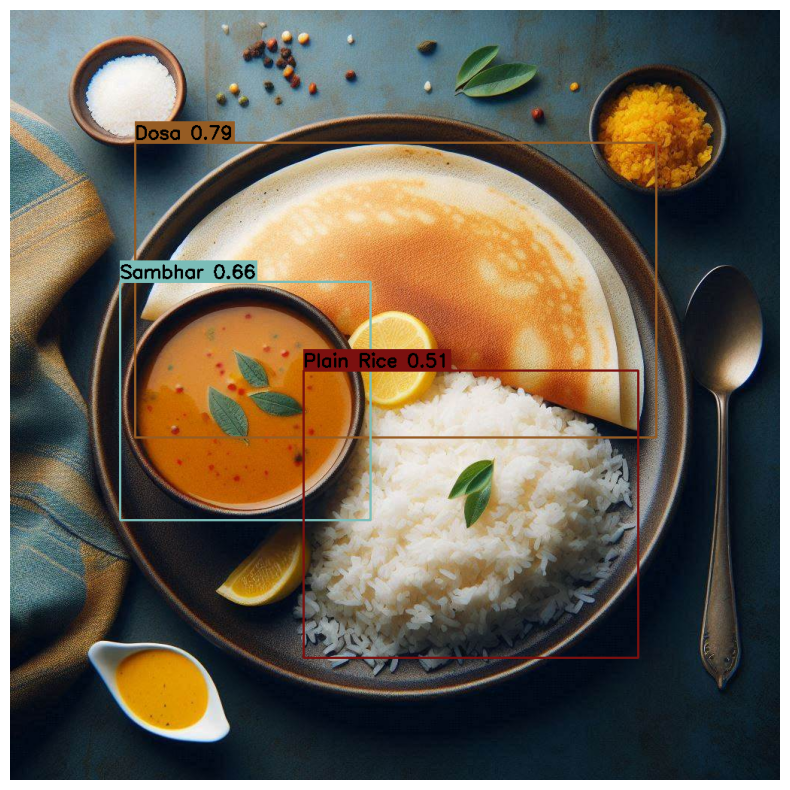

1 Dosa, 1 Cups of Sambhar, 1 Plate of Plain Rice, 
          Name Serving Size  Calories Total Fat Saturated Fat Cholesterol  \
3         Dosa         100g     170.5      3.8g          0.6g         0mg   
10  Plain Rice         100g     127.4      0.3g          0.1g         0mg   
16     Sambhar         100g      52.0      0.3g            0g         0mg   

    Sodium Carbohydrates Fiber Sugar Protein  
3     97mg           30g  0.9g  0.2g      4g  
10     1mg         28.4g  0.4g  0.1g    2.7g  
16  80.8mg         10.6g    3g  3.6g    2.8g  


In [6]:
import requests
from bs4 import BeautifulSoup
import ultralytics
from ultralytics import YOLOv10
import cv2
import os
import random
import matplotlib.pyplot as plt
ultralytics.checks()
import pandas as pd
model = YOLOv10("runs/detect/train4/weights/best.pt")
classes = ['Biriyani', 'Chole', 'Dal Makhani', 'Dosa', 'Gulab Jamun', 'Idly', 'Khichdi', 'Mango', 'Omlette', 'Paapad', 'Plain Rice', 'Poha', 'Poori', 'Rajma', 'Rasgulla', 'Roti', 'Sambhar', 'Uttapam', 'Vada', 'almond', 'apple', 'apricots', 'banana', 'dragon fruit', 'grapes', 'guava', 'orange', 'peach', 'pear', 'pineapple', 'strawberry', 'sugar apple', 'walnut']
queries = ['Plates of Biriyani', 'Cups of Chole', 'Cups of Dal Makhani', 'Dosa', 'Gulab Jamun', 'Idly', 'Khichdi', 'Mangoes', 'Omlette', 'Paapad', 'Plate of Plain Rice', 'Plate of Poha', 'Poori', 'Cups of Rajma', 'Rasgulla', 'Roti', 'Cups of Sambhar', 'Uttapam', 'Vada', 'almonds', 'apples', 'apricots', 'bananas', 'dragon fruit', 'grapes', 'guava', 'oranges', 'peaches', 'pear', 'pineapple', 'strawberries', 'sugar apples', 'walnuts']
results = model.predict("rice.jpeg",conf=0.3,save=False)
preds = {}
for result in results:
    for box in result.boxes:
        class_id = int(box.data[0][-1])
        if model.names[class_id] in preds:
            preds[model.names[class_id]] += 1
        else:
            preds[model.names[class_id]] = 1


image = cv2.imread("rice.jpeg")
annotated_image = annotate_image(image.copy(), results)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

index = []
for key in preds:
    index.append(classes.index(key))
query = ""
for i in index:
    query +=  str(preds[classes[i]]) + " " + queries[i] + ", "
print(query)

calories = pd.read_csv("calories.csv")

labels = [keys for keys in preds.keys()]

calories = calories[calories['Name'].isin(labels)]
print(calories)

In [29]:
import requests
import pandas as pd

df = pd.DataFrame(columns=['Name', 'Serving Size', 'Calories', 'Total Fat', 
           'Saturated Fat', 'Cholesterol', 'Sodium', 
           'Carbohydrates', 'Fiber', 'Sugar', 'Protein'])

api_url = 'https://api.calorieninjas.com/v1/nutrition?query='
query = "Dosa, Plain Rice, Sambhar"
response = requests.get(api_url + query, headers={'X-Api-Key': 'CNingB+Zr2GhiP1fHcZ4lg==wz4VsOZo7Z7BtkIt'})
if response.status_code == requests.codes.ok:
    response = response.json()
    for item in response['items']:
        name = item['name']
        calories = str(item['calories'])+ " kcal"
        serving_size = str(item['serving_size_g'])+ " g"
        total_fat = str(item['fat_total_g'])+ " g"
        saturated_fat = str(item['fat_saturated_g'])+ " g"
        cholesterol = str(item['cholesterol_mg'])+ " mg"
        sodium = str(item['sodium_mg'])+ " mg"
        carbohydrates = str(item['carbohydrates_total_g'])+ " g"
        fiber = str(item['fiber_g'])+ " g"
        sugar = str(item['sugar_g'])+ " g"
        protein = str(item['protein_g'])+ " g"
        l = [name, serving_size, calories, total_fat, saturated_fat, cholesterol, sodium, carbohydrates, fiber, sugar, protein]
        df.loc[len(df)] = l
    print(df)
else:
    print("Error:", response.status_code, response.text)

   Name Serving Size    Calories Total Fat Saturated Fat Cholesterol Sodium  \
0  dosa      100.0 g  170.5 kcal     3.8 g         0.6 g        0 mg  97 mg   
1  rice      100.0 g  127.4 kcal     0.3 g         0.1 g        0 mg   1 mg   

  Carbohydrates  Fiber  Sugar Protein  
0        30.0 g  0.9 g  0.2 g   4.0 g  
1        28.4 g  0.4 g  0.1 g   2.7 g  


In [2]:
import requests
from bs4 import BeautifulSoup
import ultralytics
from ultralytics import YOLOv10
import cv2
import os
import random
import matplotlib.pyplot as plt
ultralytics.checks()
import pandas as pd
model = YOLOv10("runs/detect/train4/weights/best.pt")
classes = ['Biriyani', 'Chole', 'Dal Makhani', 'Dosa', 'Gulab Jamun', 'Idly', 'Khichdi', 'Mango', 'Omlette', 'Paapad', 'Plain Rice', 'Poha', 'Poori', 'Rajma', 'Rasgulla', 'Roti', 'Sambhar', 'Uttapam', 'Vada', 'almond', 'apple', 'apricots', 'banana', 'dragon fruit', 'grapes', 'guava', 'orange', 'peach', 'pear', 'pineapple', 'strawberry', 'sugar apple', 'walnut']
queries = ['Plates of Biriyani', 'Cups of Chole', 'Cups of Dal Makhani', 'Dosa', 'Gulab Jamun', 'Idly', 'Khichdi', 'Mangoes', 'Omlette', 'Paapad', 'Plate of Plain Rice', 'Plate of Poha', 'Poori', 'Cups of Rajma', 'Rasgulla', 'Roti', 'Cups of Sambhar', 'Uttapam', 'Vada', 'almonds', 'apples', 'apricots', 'bananas', 'dragon fruit', 'grapes', 'guava', 'oranges', 'peaches', 'pear', 'pineapple', 'strawberries', 'sugar apples', 'walnuts']
results = model.predict("Apple banana Milkshake #shorts (1).mp4",conf=0.8,save=True)
print(results)
# preds = {}
# for result in results:
#     for box in result.boxes:
#         class_id = int(box.data[0][-1])
#         if model.names[class_id] in preds:
#             preds[model.names[class_id]] += 1
#         else:
#             preds[model.names[class_id]] = 1


# image = cv2.imread("rice.jpeg")
# annotated_image = annotate_image(image.copy(), results)
# plt.figure(figsize=(10, 10))
# plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
# plt.axis("off")
# plt.show()

# index = []
# for key in preds:
#     index.append(classes.index(key))
# query = ""
# for i in index:
#     query +=  str(preds[classes[i]]) + " " + queries[i] + ", "
# print(query)

# calories = pd.read_csv("calories.csv")

# labels = [keys for keys in preds.keys()]

# calories = calories[calories['Name'].isin(labels)]
# print(calories)

Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
Setup complete ✅ (12 CPUs, 7.4 GB RAM, 278.8/476.1 GB disk)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/797) c:\Users\navan\Desktop\vit materials\VS\PJT\Apple banana Milkshake #shorts (1).mp4: 640x384 (no detections), 34.2ms
video 1/1 (frame 2/797) c:\Users\navan\Desktop\vit materials\VS\PJT\Apple banana Milkshake #shorts (1).mp4: 640x384 (no detections), 29.1ms
video 1/1 (frame